In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

In [2]:
# input data
delta,t,V,Vp = np.genfromtxt('strain_data.txt',unpack=True,missing_values='N/A')

In [3]:
print(delta)
print(t)
print(V)
print(Vp)

[0.   0.05 0.1  0.15 0.2  0.25 0.3 ]
[1.4461 1.2687 1.1157 0.9833 0.8682 0.7684 0.6816]
[66.1  34.7  17.3   7.7   2.6  -0.1  -1.35]
[-2.  -1.5 -1.1 -0.9 -0.7 -0.5 -0.4]


In [4]:
V_sim=[x for x in V if not np.isnan(x)]
delta_sim=[]
for i,x in enumerate(V):
    if not np.isnan(x):
        delta_sim.append(delta[i])
print(V_sim)
print(delta_sim)

[66.1, 34.7, 17.3, 7.7, 2.6, -0.1, -1.35]
[0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3]


In [5]:
tinterp = interpolate.CubicSpline(delta,t)
Vinterp = interpolate.CubicSpline(delta_sim,V_sim)
Vpinterp = interpolate.CubicSpline(delta,Vp)
interp = interpolate.CubicSpline(delta,np.array(V_sim)/np.array(Vp))

In [6]:
# tinterp = interpolate.interp1d(delta,t,kind='cubic')
# Vinterp = interpolate.interp1d(delta_sim,V_sim,kind='cubic')
# Vpinterp = interpolate.interp1d(delta,Vp,kind='cubic')

In [7]:
# Define energy list

def gamma(s,a):
    return (s*a - 1)/(a + 1)

def term1(t,mu,s,a):
    return (t + mu/6)

def term2(t,mu,s,a):
    return (t + mu/6)*(t - mu/6 + gamma(s,a))

def term3(t,mu,s,a):
    return 2*t + gamma(s,a)

def e13(t,mu,s,a):
    return (-mu - 3/(a + 1))*16

def e23(t,mu,s,a):
    return (-2*mu + (3*s*a - 6)/(a + 1))*16

def e33(t,mu,s,a):
    return (-3*mu + 9*(s*a - 1)/(a + 1))*16

def e716(t,mu,s,a):
#     return -21*mu + 18*s*a/(a + 1) - 36/(a + 1)
    return -21*mu + 27*(s*a - 1)/(a + 1)

def esf(t,mu,s,a):
    return (-9*(t + mu/6)**2/(2*t + gamma(s,a)))*16

def lst(t,mu,s,a):
    if (term2(t,mu,s,a) > 0 \
        and 1 >= term1(t,mu,s,a)/term3(t,mu,s,a) \
        and term1(t,mu,s,a)/term3(t,mu,s,a) > 0):
        return [e13(t,mu,s,a), e716(t,mu,s,a), e23(t,mu,s,a), e33(t,mu,s,a), esf(t,mu,s,a), 0.0]
    else:
        return [e13(t,mu,s,a), e716(t,mu,s,a), e23(t,mu,s,a), e33(t,mu,s,a), 999999.0, 0.0]

def pref_state(t,mu,s,a):
    return lst(t,mu,s,a).index(min(lst(t,mu,s,a)))

In [8]:
tinterp = interpolate.CubicSpline(delta,t)
Vinterp = interpolate.CubicSpline(delta_sim,V_sim)
Vpinterp = interpolate.CubicSpline(delta,Vp)
ainterp = interpolate.CubicSpline(delta,np.array(V_sim)/np.array(Vp))

1000
1000
1000
3000


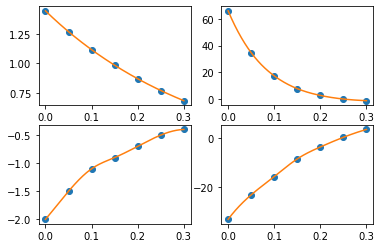

In [9]:
nx = 1000
ny = 3000
delta_new = np.linspace(0, 0.3, nx)

tnew = tinterp(delta_new)   # use interpolation function returned by `interp1d`
Vnew = Vinterp(delta_new)
Vpnew = Vpinterp(delta_new)
anew = ainterp(delta_new)
fig, axs = plt.subplots(2, 2)
axs[0,0].plot(delta, t, 'o', delta_new, tnew, '-')
axs[0,1].plot(delta_sim, V_sim, 'o', delta_new, Vnew, '-')
axs[1,0].plot(delta, Vp, 'o', delta_new, Vpnew, '-')
axs[1,1].plot(delta, np.array(V_sim)/np.array(Vp), 'o', delta_new, anew, '-')

a_lst = [-x/y if x>=0 else x/y for x, y in zip(Vnew,Vpnew)]
s_lst = [1 if x>=0 else -1 for x in Vnew]
norm = [x-y if x>=0 else -x-y for x, y in zip(Vnew,Vpnew)]

mu_lst = np.linspace(-20,120,ny)
tbar = [x/y for x, y in zip(tnew,norm)]

print(len(a_lst))
print(len(s_lst))
print(len(tbar))
print(len(mu_lst))

In [10]:
# import matplotlib.font_manager as font_manager
# from matplotlib import rcParams
# font_dir = ['/usr/share/fonts/HelveticaNeue']
# matplotlib.font_manager.findSystemFonts(fontpaths=font_dir, fontext='ttf')

In [11]:
# # Add every font at the specified location
# font_dir = ['/usr/share/fonts/HelveticaNeue']
# for font in font_manager.findSystemFonts(font_dir):
#     print(font)
#     font_manager.fontManager.addfont(font)

# Abstract PD

# a = 33 (0% strain)

In [26]:
import matplotlib.colors as mcolors
import matplotlib.patches as patches

def ab_pdmaker (t, mu, data, dt, dmu):
#     cmap = plt.cm.get_cmap('viridis')
#     colors = [cmap(i*0.3) for i in range(4)]
    if len(np.unique(data)) >= 5:
        cMap = mcolors.ListedColormap([
            'aquamarine', 
            'turquoise', 
            'lightseagreen', 
            'coral', 
            'snow'])
        fig, ax = plt.subplots()
        p1 = ax.contourf(t, mu, data, 5, vmin = 0, vmax = 5, cmap = cMap)
    else:
        cMap = mcolors.ListedColormap([ 
            'lightseagreen', 
            'coral', 
            'snow'])
        fig, ax = plt.subplots()
        p1 = ax.contourf(t, mu, data, 3, vmin = 3, vmax = 5, cmap = cMap)

#     ax.set_title('Phase Diagram')
    ax.set_xlabel('tbar', fontsize = 16)
    ax.set_ylabel('mubar', fontsize = 16)
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.set_xlim(0,0.69)
    ax.set_ylim(-7.9,7.9)
    
    if dt < 0.05:
        rect = patches.Rectangle((0.05, -6.0), dt*10, dmu*10, ec="dodgerblue", fill=False)
        ax.add_patch(rect)
        ax.text(0.1, -6.0, '10 grid box size', fontsize = 12,)
    
    else:
        xgridset = np.arange(0, 0.7, dt)
        ygridset = np.arange(-8, 8, dmu)

        ax.set_xticks(xgridset, minor=True)
        ax.set_yticks(ygridset, minor=True)
        ax.grid(which='minor', color='dodgerblue', linewidth=0.6)
        ax.tick_params(which='minor', bottom=False, left=False)
    
#     cbar = fig.colorbar(p1)
#     cbar.ax.set_ylabel('Phase Index')
    plt.tight_layout()
    plt.show()
    return fig

In [13]:
nx = 500
ny = 500

In [14]:
ab_tbar = np.linspace(0,0.7,nx)
ab_mubar = np.linspace(-8,8,ny)
ab_data = np.zeros((ny,nx))
s = 1
a = 33
ainterp_2 = interpolate.CubicSpline(delta,np.array(V_sim)/np.array(Vp)+a)
root = ainterp_2.roots()[0]
sampleV = Vinterp(root)
sampleVp = Vpinterp(root)
dt = 0.2/(abs(sampleV)+abs(sampleVp))
dmu = 5/(abs(sampleV)+abs(sampleVp))

for i in range(nx):
    for j in range(ny):
        ab_data[j,i] = pref_state(ab_tbar[i],ab_mubar[j],s,a)

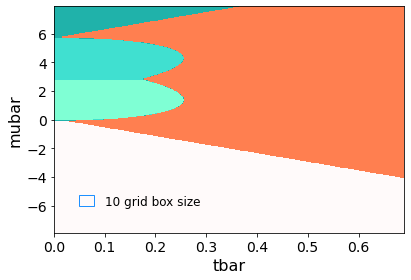

In [27]:
fig1 = ab_pdmaker(ab_tbar, ab_mubar, ab_data, dt, dmu)
fig1.savefig('pd1.png')

# a = 1

In [28]:
ab_tbar = np.linspace(0,0.7,nx)
ab_mubar = np.linspace(-8,8,ny)
ab_data = np.zeros((ny,nx))
s = 1
a = 1
ainterp_2 = interpolate.CubicSpline(delta,np.array(V_sim)/np.array(Vp)+a)
root = ainterp_2.roots()[0]
sampleV = Vinterp(root)
sampleVp = Vpinterp(root)
dt = 0.2/(abs(sampleV)+abs(sampleVp))
dmu = 5/(abs(sampleV)+abs(sampleVp))

for i in range(nx):
    for j in range(ny):
        ab_data[j,i] = pref_state(ab_tbar[i],ab_mubar[j],s,a)

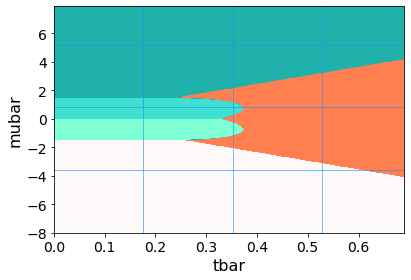

In [29]:
fig2 = ab_pdmaker(ab_tbar, ab_mubar, ab_data, dt, dmu)
fig2.savefig('pd2.png')

# s = -1, a = 1 (both attractive)

In [99]:
ab_tbar = np.linspace(0,0.7,nx)
ab_mubar = np.linspace(-8,8,ny)
ab_data = np.zeros((ny,nx))
s = -1.0
a = 1.0
ainterp_2 = interpolate.CubicSpline(delta,np.array(V_sim)/np.array(Vp)-a)
root = ainterp_2.roots()[0]
sampleV = Vinterp(root)
sampleVp = Vpinterp(root)
dt = 0.2/(abs(sampleV)+abs(sampleVp))
dmu = 4/(abs(sampleV)+abs(sampleVp))

for i in range(nx):
    for j in range(ny):
        ab_data[j,i] = pref_state(ab_tbar[i],ab_mubar[j],s,a)

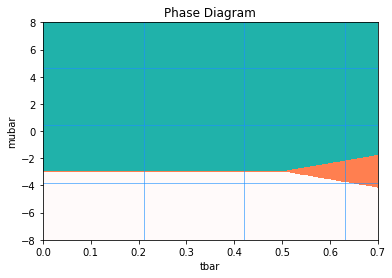

In [100]:
ab_pdmaker(ab_tbar, ab_mubar, ab_data, dt, dmu)
fig3.savefig('pd1.png')

# Physical PD

In [168]:
mubar = np.zeros((ny,nx))
data = np.zeros((ny,nx))
print(np.shape(mubar))
print(np.shape(data))
for i in range(nx):
    for j in range(ny):
        mubar[j,i] = mu_lst[j]/norm[i]

for i in range(nx):
    for j in range(ny):
        data[j,i] = pref_state(tbar[i],mubar[j,i],s_lst[i],a_lst[i])

(3000, 1000)
(3000, 1000)


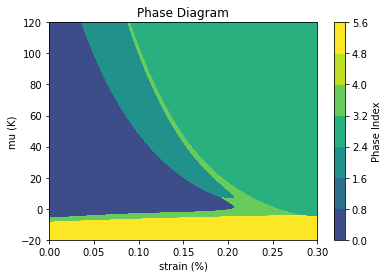

In [169]:
# cmap = plt.cm.get_cmap('Accent')
cmap = plt.cm.get_cmap('viridis')

colors = [cmap(i*0.3) for i in range(4)]

fig, ax = plt.subplots()

# X, Y = np.meshgrid(delta_new, mu_lst)
p1 = ax.contourf(delta_new, mu_lst, data, 6, vmin = -1, vmax = 5)

ax.set_title('Phase Diagram')
ax.set_xlabel('strain (%)')
ax.set_ylabel('mu (K)')

cbar = fig.colorbar(p1)
cbar.ax.set_ylabel('Phase Index')
# Add the contour line levels to the colorbar
# cbar.add_lines(p1)

# plt.colorbar(p1)
# cbar.ax.set_ylabel('verbosity coefficient')
# # Add the contour line levels to the colorbar
# cbar.add_lines(CS2)
# plt.xlabel("strain (%)")
# plt.ylabel("mu")
plt.show()
# fig.savefig('phase_diagram_strain2.png')